# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация
Дата выдачи: **12.10.2022**

Мягкий дедлайн: **1.11.22 23:59** (за каждый день просрочки снимается 1 балл)

Жесткий дедлайн: **8.11.22 23:59**

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 балла бонус.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-gd-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: 10?

Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — полный градиентный спуск, стохастический градиентный спуск, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и ещё много чего веселого и интересного!

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое-теоретическое отступление № 1

Основное свойство антиградиента &ndash; он указывает в сторону наискорейшего убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента,
пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (например, нулевой или сгенерированный из некоторого
случайного распределения). Тогда ванильный градиентный спуск состоит в повторении следующих шагов до сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое-теоретическое отступление № 2

На семинаре про [матрично-векторное дифференцирование](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/seminars/sem03-vector-diff.pdf) вы должны были обсуждать дифференцирование функции потерь MSE в матричном виде.

### Задание 1.0. Градиент MSE в матричном виде (0 баллов).

Напомним, что функция потерь MSE записывается в матричном виде как:

$$
    Q(w) = \dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)
$$

Выпишите ниже (подсмотрев в семинар или решив самостоятельно) градиент для функции потерь MSE в матричном виде.

$$\frac{dQ}{dw} = \frac{2}{l} \cdot X^T (Xw - y) $$

### Задание 1.1. Родительский класс BaseDescent (0.5 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.5 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$.

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Лирическое-теоретическое отступление № 3

Как правило, в задачах машинного обучения функционал $Q(w)$ представим в виде суммы $\ell$ функций:

$$
    Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        q_i(w).
$$

В нашем домашнем задании отдельные функции $q_i(w)$ соответствуют ошибкам на отдельных объектах.

Проблема метода градиентного спуска состоит в том, что на каждом шаге необходимо вычислять градиент всей суммы (будем его называть полным градиентом):

$$
    \nabla_w Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        \nabla_w q_i(w).
$$

Это может быть очень трудоёмко при больших размерах выборки. В то же время точное вычисление градиента может быть не так уж необходимо &ndash; как правило, мы делаем не очень большие шаги в сторону антиградиента, и наличие в нём неточностей не должно сильно сказаться на общей траектории.

Оценить градиент суммы функций можно средним градиентов случайно взятого подмножества функций:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}),
$$
где $B$ - это случайно выбранное подмножество индексов.

В этом случае мы получим метод **стохастического градиентного спуска**.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.5 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### Лирическое-теоретическое отступление № 4

Может оказаться, что направление антиградиента сильно меняется от шага к шагу. Например, если линии уровня функционала сильно вытянуты, то из-за ортогональности градиента линиям уровня он будет менять направление на почти противоположное на каждом шаге. Такие осцилляции будут вносить сильный шум в движение, и процесс оптимизации займёт много итераций. Чтобы избежать этого, можно усреднять векторы антиградиента с нескольких предыдущих шагов &ndash; в этом случае шум уменьшится, и такой средний вектор будет указывать в сторону общего направления движения. Введём для этого вектор инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k})
\end{align}

Здесь $\alpha$ &ndash; параметр метода, определяющей скорость затухания градиентов с предыдущих шагов. Разумеется, вместо вектора градиента может быть использована его аппроксимация. Чтобы сделать шаг градиентного спуска, просто сдвинем предыдущую точку на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Заметим, что если по какой-то координате градиент постоянно меняет знак, то в результате усреднения градиентов в векторе инерции эта координата окажется близкой к нулю. Если же по координате знак градиента всегда одинаковый, то величина соответствующей координаты в векторе инерции будет большой, и мы будем делать большие шаги в соответствующем направлении.

### Задание 1.4 Метод Momentum MomentumDescent (0.5 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическое-теоретическое отступление № 5

Градиентный спуск очень чувствителен к выбору длины шага. Если шаг большой, то есть риск, что мы будем перескакивать через точку минимума; если же шаг маленький, то для нахождения минимума потребуется много итераций. При этом нет способов заранее определить правильный размер шага &ndash; к тому же, схемы с постепенным уменьшением шага по мере итераций могут тоже плохо работать.

В методе AdaGrad предлагается сделать свою длину шага для каждой компоненты вектора параметров. При этом шаг будет тем меньше, чем более длинные шаги мы делали на предыдущих итерациях:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Здесь $\varepsilon$ небольшая константа, которая предотвращает деление на ноль.

В данном методе можно зафксировать длину шага (например, $\eta_k = 0.01$) и не подбирать её в процессе обучения. Отметим, что данный метод подходит для разреженных задач, в которых у каждого объекта большинство признаков равны нулю. Для признаков, у которых ненулевые значения встречаются редко, будут делаться большие шаги; если же какой-то признак часто является ненулевым, то шаги по нему будут небольшими.

У метода AdaGrad есть большой недостаток: переменная $G_{kj}$ монотонно растёт, из-за чего шаги становятся всё медленнее и могут остановиться ещё до того, как достигнут минимум функционала. Проблема решается в методе RMSprop, где используется экспоненциальное затухание градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

В этом случае размер шага по координате зависит в основном от того, насколько
быстро мы двигались по ней на последних итерациях.

Можно объединить идеи описанных выше методов: накапливать градиенты со всех прошлых шагов для
избежания осцилляций и делать адаптивную длину шага по каждому параметру.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (1.5 балла).

![](adam_meme.png)

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Реализация линейной регресии (0.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `linear_regression.py` - **LinearRegression**. По сути линейная регрессия будет оберткой, которая запускает обучение 

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускаются только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`;
    * Разность весов содержит наны;
    * Достижение максимального числа итераций `max_iter`.
* Будем считать, что все данные, которые поступают на вход имеют столбец единичек последним столбцом;
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту) и значение функции потерь после оптимизации.

## Задание 3. Проверка кода (0 баллов)

In [2]:
%load_ext autoreload

In [3]:
%autoreload 2

import numpy as np

from descents import get_descent
from linear_regression import LinearRegression

In [4]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [5]:
# Descents

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [6]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 2, 'Loss history failed'

Если ваше решение прошло все тесты локально, то теперь пришло время протестировать его в [Яндекс Контесте](https://contest.yandex.ru/contest/41257/enter/).

Для каждой задачи из контеста вставьте ссылку на успешную посылку:

* **VanillaGradientDescent**: https://contest.yandex.ru/contest/41257/problems/A/


* **StochasticDescent**: https://contest.yandex.ru/contest/41257/problems/B/


* **MomentumDescent**: https://contest.yandex.ru/contest/41257/problems/C/


* **Adam**: https://contest.yandex.ru/contest/41257/problems/D/


* **LinearRegression**: https://contest.yandex.ru/contest/41257/problems/E/

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

* Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

* Проведите исследование данных:
    * Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;
    * Подумайте, какие признаки могут быть полезными на основе этих графиков, обработайте выбросы;
    * Подумайте, какие трансформации признаков из известных вам будет уместно применить;
    * Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

In [7]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from descents import get_descent
from linear_regression import LinearRegression

sns.set(style='darkgrid')

In [8]:
data = pd.read_csv('autos.csv')

In [9]:
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000


Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

In [10]:
data.dtypes

brand                object
model                object
vehicleType          object
gearbox              object
fuelType             object
notRepairedDamage    object
powerPS               int64
kilometer             int64
autoAgeMonths         int64
price                 int64
dtype: object

In [11]:
data.describe()

,powerPS,kilometer,autoAgeMonths,price
count,241190.000000,241190.000000,241190.000000,241190.000000
mean,131.271628,123766.677723,144.768676,6887.741892
std,60.622613,39825.955933,73.092598,8024.451993
min,51.000000,5000.000000,1.000000,1.000000
25%,90.000000,100000.000000,92.000000,1750.000000
50%,120.000000,150000.000000,140.000000,4100.000000
75%,160.000000,150000.000000,192.000000,8999.000000
max,589.000000,150000.000000,600.000000,99999.000000


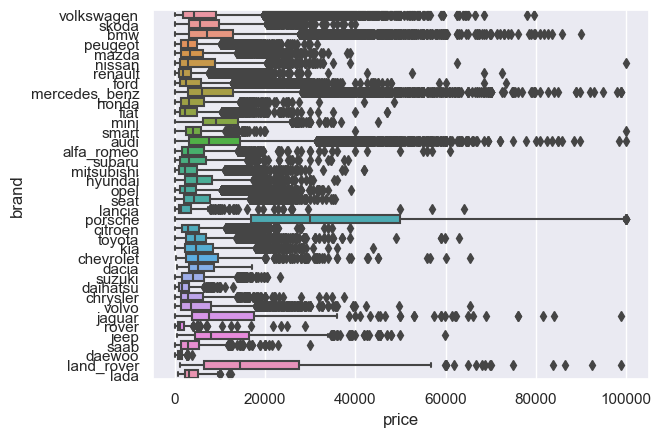

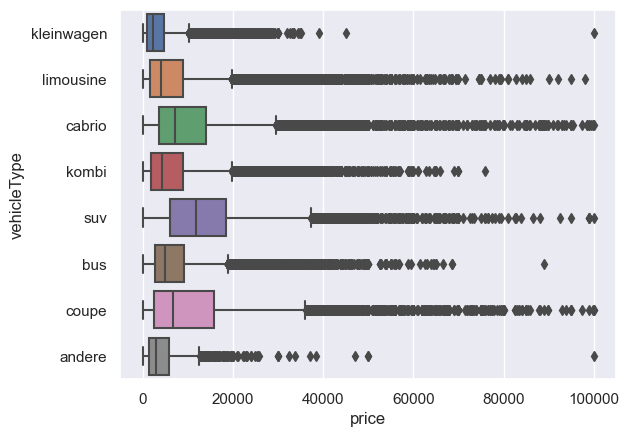

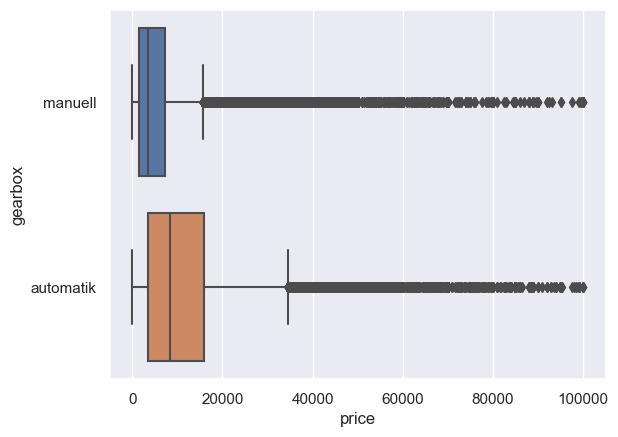

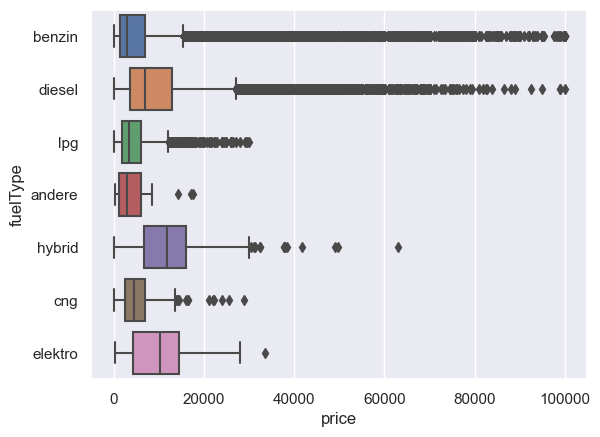

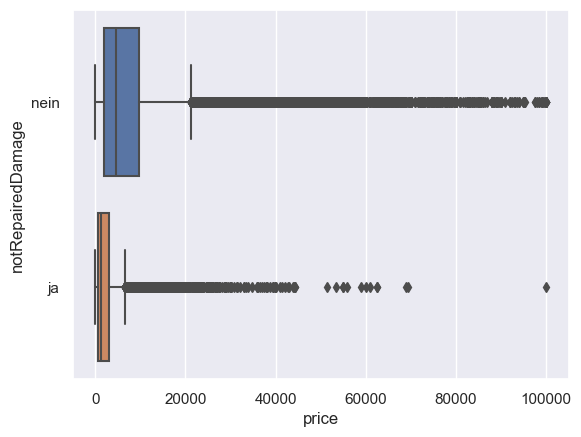

In [12]:
boxplot_features = ["brand", "vehicleType", "gearbox", "fuelType", "notRepairedDamage"]
for feature in boxplot_features:
    sns.boxplot(data=data, x="price", y=feature)
    plt.show()

Из графиков выше видно, что на этих признаках неплохо различается распределение цены, их стоит использовать.


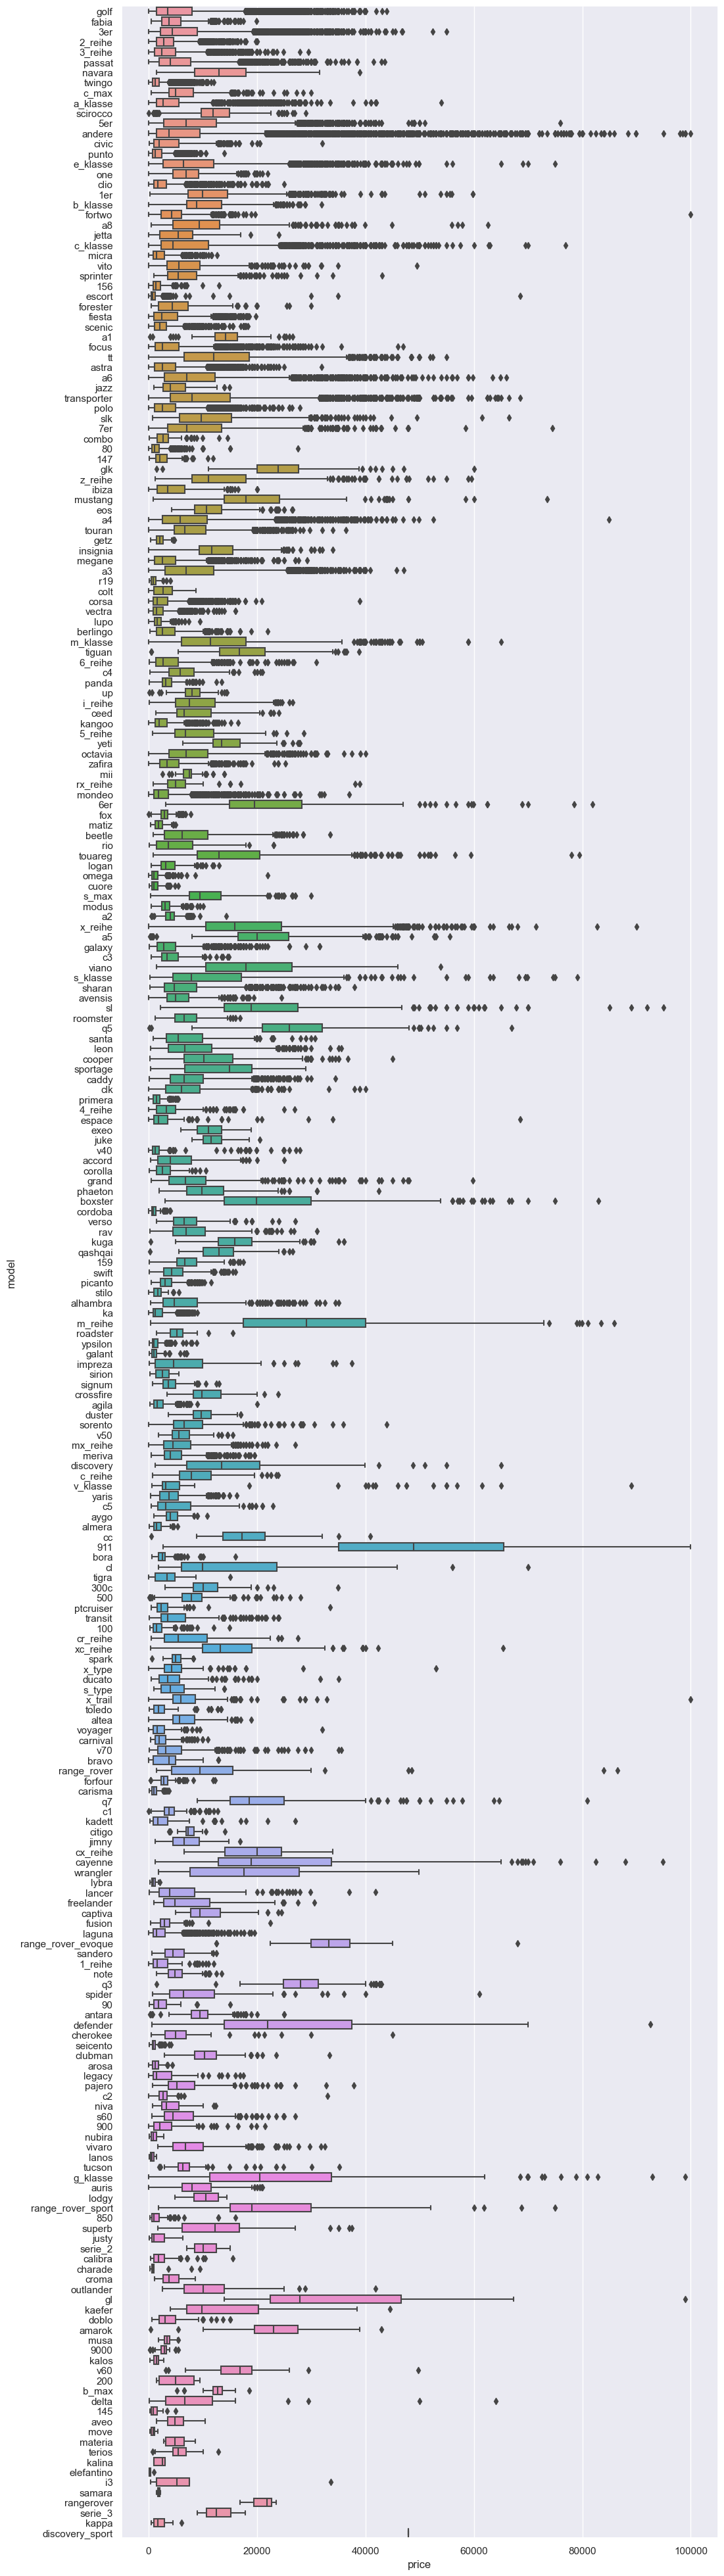

In [13]:
sns.set(rc={'figure.figsize':(11.7, 50)})
sns.boxplot(data=data, x="price", y="model")
plt.show()

Тут уже у многих похожи распределения, но это ничего, ведь если это пропустить через OHE, то на каждую модель будет свой признак и регрессия сама разберется

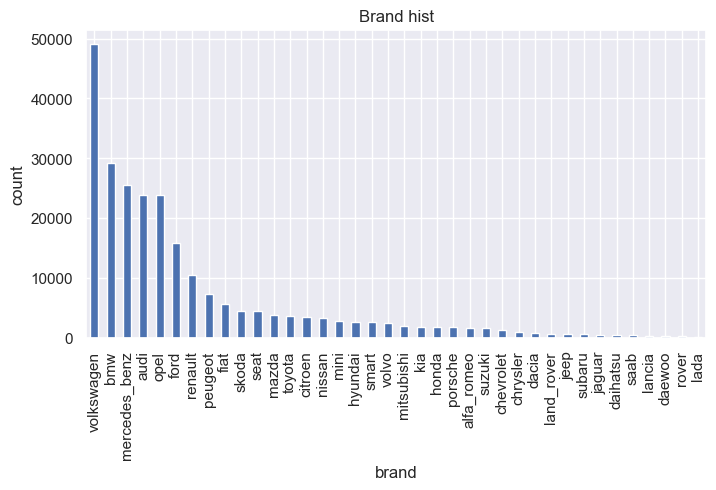

In [14]:
fig = plt.figure(figsize = (8,4))
ax = fig.gca()
data.brand.value_counts().plot.bar(ax=ax)
plt.xlabel("brand")
plt.ylabel("count")
plt.title("Brand hist")
plt.show()

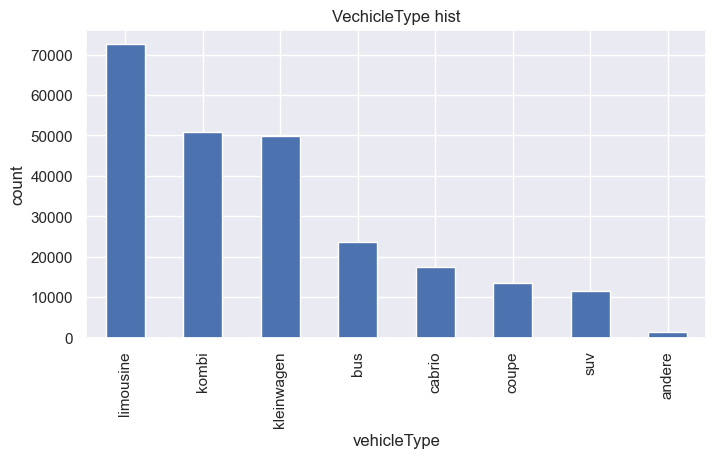

In [15]:
fig = plt.figure(figsize = (8,4))
ax = fig.gca()
data.vehicleType.value_counts().plot.bar(ax=ax)
plt.xlabel("vehicleType")
plt.ylabel("count")
plt.title("VechicleType hist")
plt.show()

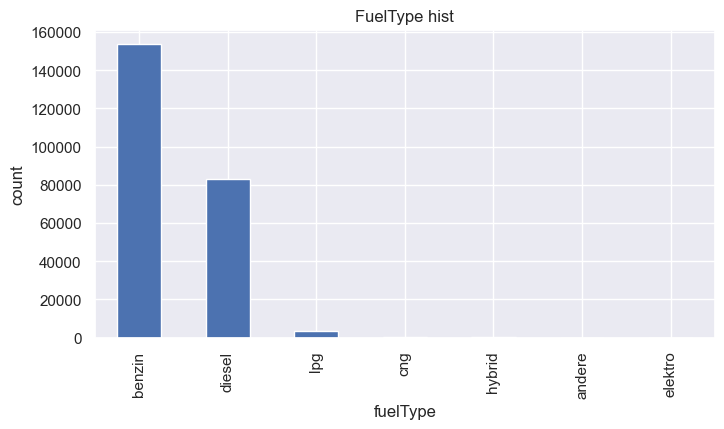

In [16]:
fig = plt.figure(figsize = (8,4))
ax = fig.gca()
data.fuelType.value_counts().plot.bar(ax=ax)
plt.xlabel("fuelType")
plt.ylabel("count")
plt.title("FuelType hist")
plt.show()

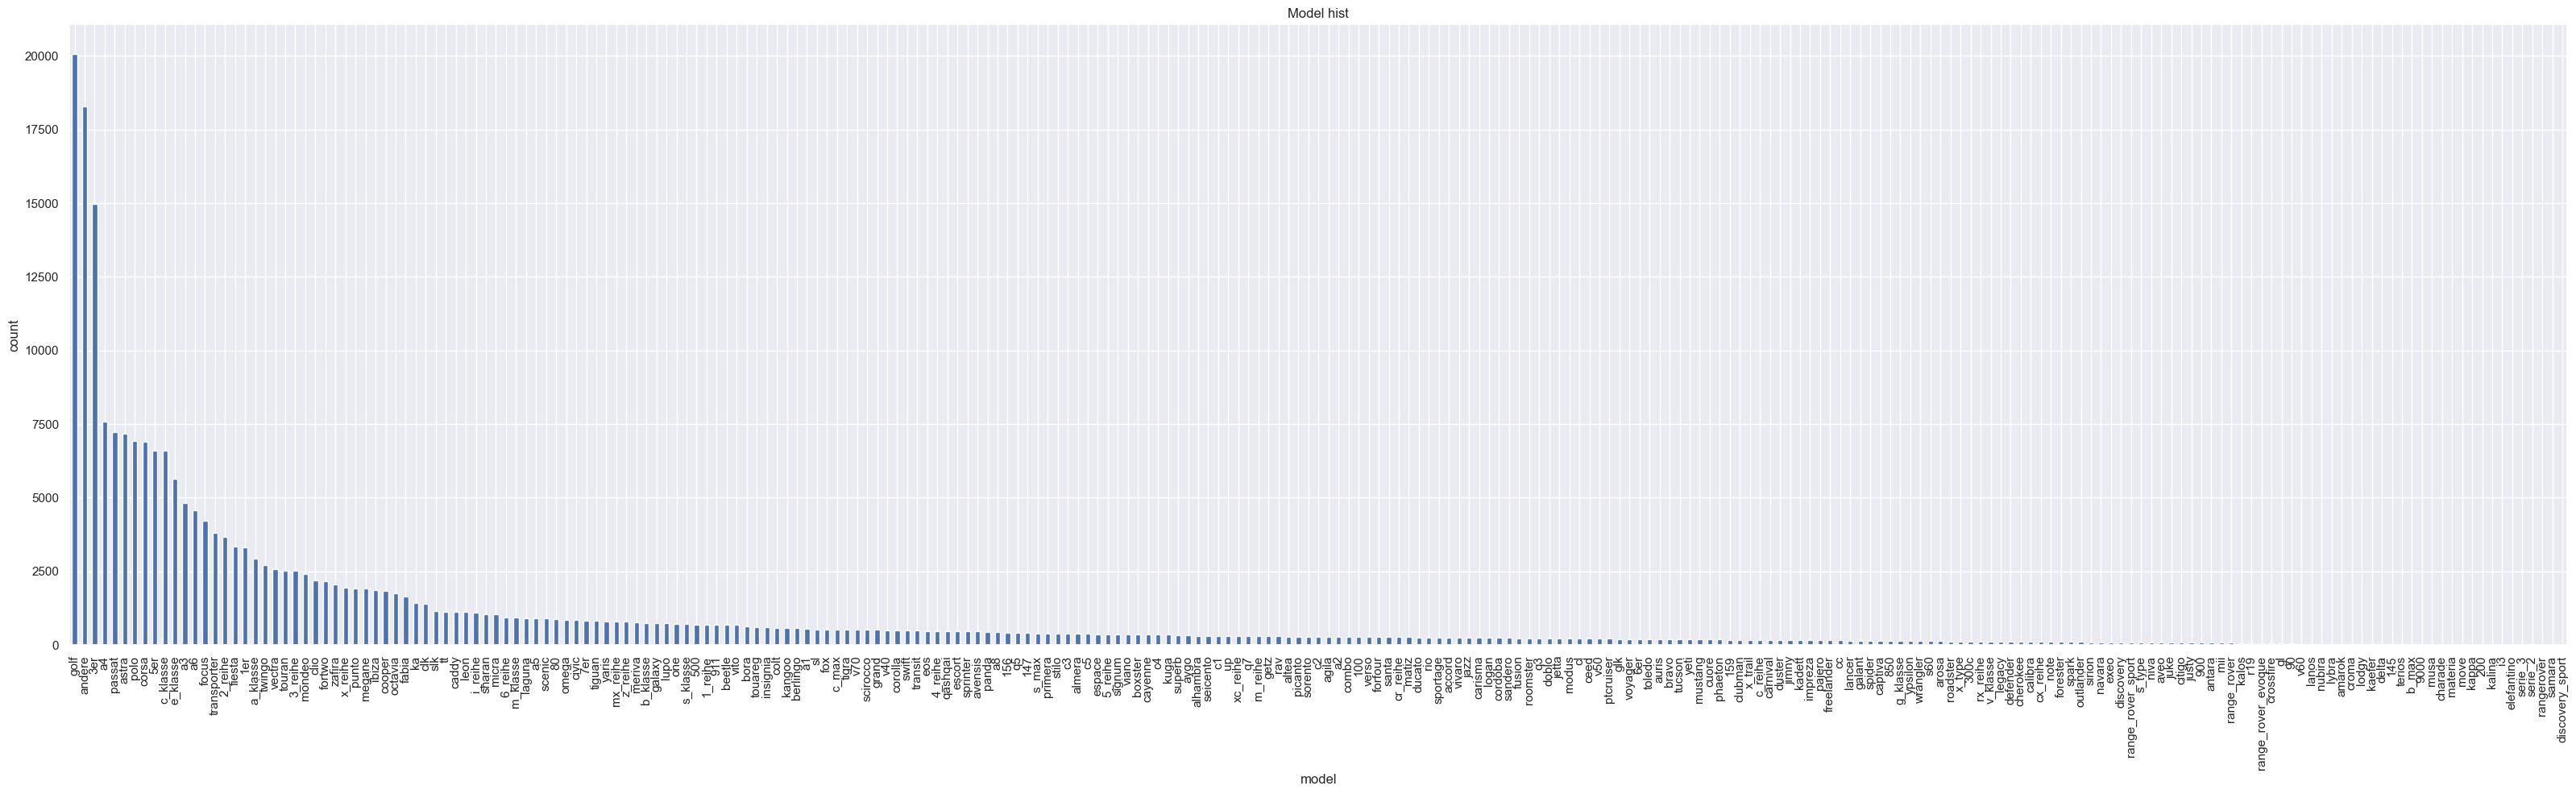

In [17]:
fig = plt.figure(figsize = (40,10))
ax = fig.gca()
data.model.value_counts().plot.bar(ax=ax)
plt.xlabel("model")
plt.ylabel("count")
plt.title("Model hist")
plt.show()

Вот из распределений выше в целом понятно, что идея объединять какие-то редкие категории в одну не очень хорошая: так как редкие категории сами по себе очень разные, там встречаются и лады и range rover и др, объединение только собьет модель с толку. Надо все через OHE прогнать и будет топ. Так как у нас довольно большая выборка, то количество признаков в райное 500 будет нормально. 

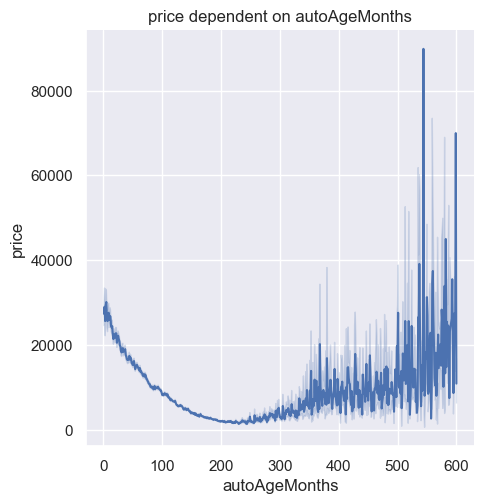

In [18]:
(sns.relplot(x="autoAgeMonths",
             y='price',
             data=data,
             kind="line")
 .set_axis_labels('autoAgeMonths', 'price'))

plt.title("price dependent on autoAgeMonths")
plt.show()

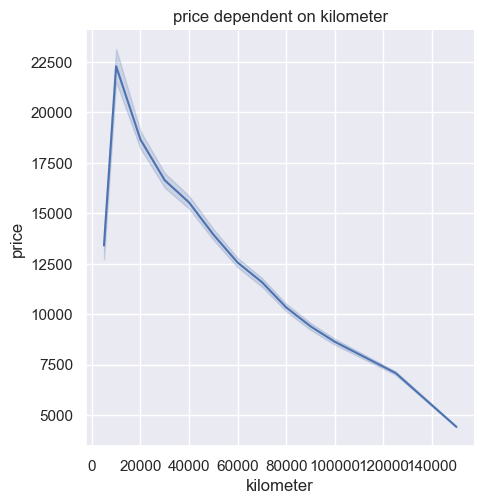

In [19]:
(sns.relplot(x="kilometer",
             y='price',
             data=data,
             kind="line",
             )
 .set_axis_labels('kilometer', 'price'))

plt.title("price dependent on kilometer")
plt.show()

In [20]:
data["kilometer"].unique()

array([150000,  90000,  70000, 100000,  60000,  20000, 125000,  30000,
        80000,  50000,  40000,  10000,   5000])

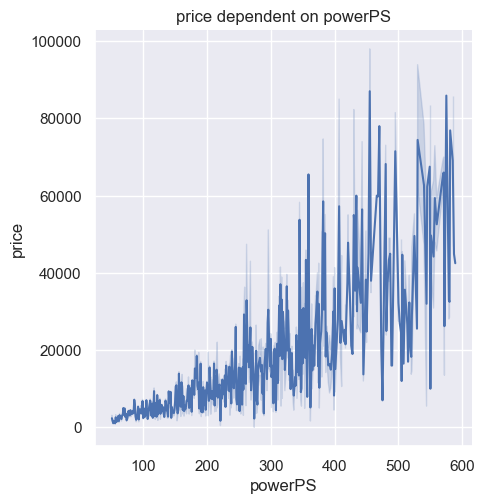

In [21]:
(sns.relplot(x="powerPS",
             y='price',
             data=data,
             kind="line")
 .set_axis_labels('powerPS', 'price'))

plt.title("price dependent on powerPS")
plt.show()

Наблюдаем следующую картину:
* Возраст машины

С этим признаком все понятно: если машина новая, то она подороже, если постарше, то подешевле, но если она супер старая, то это либо хлам, либо раритет, поэтому в самом конце так колбасит. Тут явно зависимость никакая не линейная, сначала падает, потом растет, потом жесткий разнос. Мб стоит разбить на интервалы и сделать этот признак категориальным.
*  Пробег

Сначала растет цена, а потом начинает снижение. При том и в первом, и во втором случае около-линейная зависимость. Так как уникальных значение у этого признака немного, то можно его сделать категориальным.
*  Мощность

Тут восходящий тренд, с флуктуациями, конечно, но тем не менее, мб стоит просто оставить как есть (ну нормализовать офк).

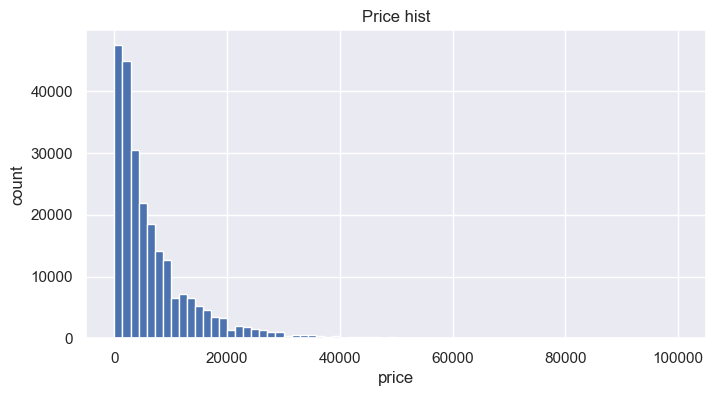

In [22]:
fig = plt.figure(figsize = (8,4))
ax = fig.gca()
data.hist("price", ax=ax, bins=70)
plt.xlabel("price")
plt.ylabel("count")
plt.title("Price hist")
plt.show()

In [23]:
data["log_price"] = np.log1p(data["price"])

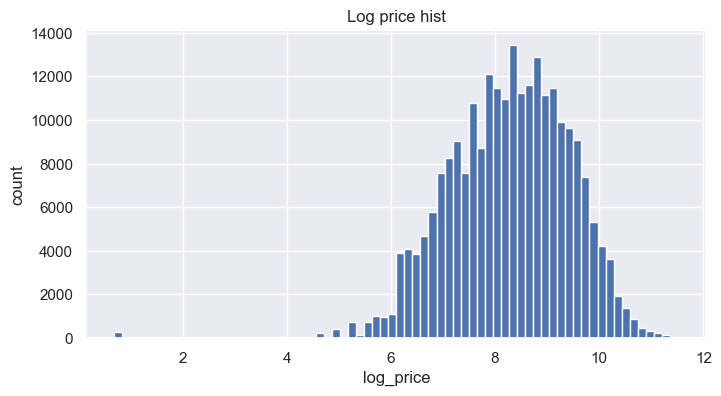

In [24]:
fig = plt.figure(figsize = (8,4))
ax = fig.gca()
data.hist("log_price", ax=ax, bins=70)
plt.xlabel("log_price")
plt.ylabel("count")
plt.title("Log price hist")
plt.show()

 Распределение таргета похоже на логнормальное, есть очень большие цены (выборсы), из будем из трейна удалять. 

Теперь сделаем из "autoAgeMonths" категориальный признак, на основе разбиения оси на равные промежутки.

In [25]:
autoAgeMonths_cat_num = 4
data["autoAgeMonths"] = \
    pd.cut(data["autoAgeMonths"], autoAgeMonths_cat_num, labels=[_ for _ in range(autoAgeMonths_cat_num )])

In [26]:
data

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price,log_price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,1,1500,7.313887
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,0,3600,8.188967
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,1,650,6.478510
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,0,2200,7.696667
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,0,2000,7.601402
...,...,...,...,...,...,...,...,...,...,...,...
241185,volkswagen,golf,limousine,manuell,diesel,nein,140,150000,0,7900,8.974745
241186,seat,leon,limousine,manuell,benzin,ja,225,150000,0,3200,8.071219
241187,smart,fortwo,cabrio,automatik,benzin,nein,101,125000,1,1199,7.090077
241188,volkswagen,transporter,bus,manuell,diesel,nein,102,150000,1,9200,9.127067


In [27]:
categorical = ["brand", "model", "vehicleType", "gearbox", "fuelType", "notRepairedDamage", "kilometer", "autoAgeMonths"]
numeric = ["powerPS"]
other = []

# YOUR CODE (EDA):

In [28]:
from sklearn.model_selection import train_test_split

data['bias'] = 1
train, test = train_test_split(data, test_size=0.2)
val, test = train_test_split(test, test_size=0.5)

Чистим трейн от выбросов

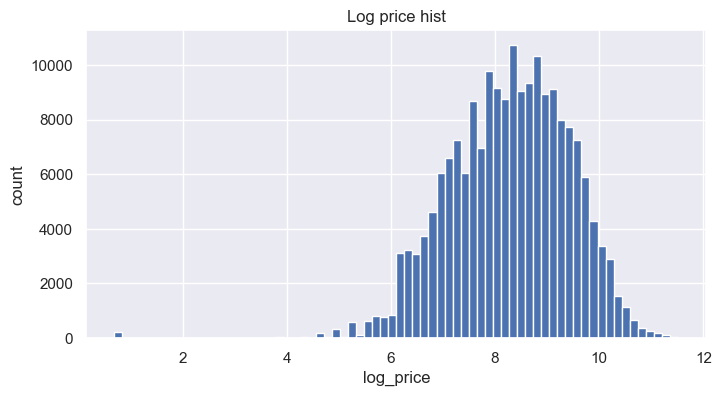

In [29]:
fig = plt.figure(figsize = (8,4))
ax = fig.gca()
train.hist("log_price", ax=ax, bins=70)
plt.xlabel("log_price")
plt.ylabel("count")
plt.title("Log price hist")
plt.show()

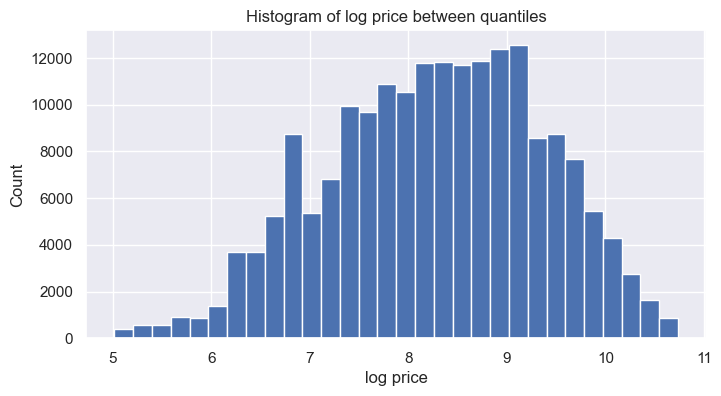

In [30]:
quantile_1 = train["log_price"].quantile(q=0.995)
quantile_2 = train["log_price"].quantile(q=0.004)

fig = plt.figure(figsize = (8,4))

n, bins, patches = plt.hist(train[(train["log_price"] <= quantile_1)\
                                 & ((train["log_price"] >= quantile_2))]["log_price"], bins=30)


plt.xlabel('log price')
plt.ylabel('Count')
plt.title('Histogram of log price between quantiles')
plt.grid(True)
plt.show()

In [31]:
train.shape

(192952, 12)

In [32]:
train = train[(train["log_price"] <= quantile_1)\
                                 & ((train["log_price"] >= quantile_2))]

In [33]:
train.shape

(191360, 12)

In [34]:

other += ['bias']

x_train = train[categorical + numeric + other]
y_train = train['log_price'].to_numpy()

x_val = val[categorical + numeric + other]
y_val = val["log_price"].to_numpy()

x_test = test[categorical + numeric + other]
y_test = test["log_price"].to_numpy()

In [35]:
print("Train shapes: ", x_train.shape, y_train.shape)
print("Val shapes: ", x_val.shape, y_val.shape)
print("Test shapes: ", x_test.shape, y_test.shape)

Train shapes:  (191360, 10) (191360,)
Val shapes:  (24119, 10) (24119,)
Test shapes:  (24119, 10) (24119,)


In [36]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler




column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric,),
])


In [37]:
x_train = column_transformer.fit_transform(x_train)
x_val = column_transformer.transform(x_val)
x_test = column_transformer.transform(x_test)

## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (1 балл)

Подберите по валидационной выборке наилучшую длину шага $\lambda$ для каждого метода с точки зрения ошибки. Для этого сделайте перебор по логарифмической сетке. Для каждого метода посчитайте ошибку на обучающей и тестовой выборках, посчитайте качество по метрике $R^2$, сохраните количество итераций до сходимости.

Все параметры кроме `lambda_` стоит выставить равным значениям по умолчанию.

In [119]:
from dataclasses import dataclass


@dataclass
class Result:
    losses : list
    lambda_ : float
    test_loss : float
    train_loss : float
    val_loss : float
    iter_count : int
    r2_metric_test : float
    r2_metric_train : float
    r2_metric_val : float
    mu : float = -1


In [ ]:
methods = ["full", "stohastic", "momentum", "adam"]
lambdas = np.logspace(-2, 1, 14)
from sklearn.metrics import r2_score

methods_results = {
    "full" : [],
    'stochastic' : [],
    "momentum": [],
     "adam": []
}

for method in methods_results:
    for lambda_ in lambdas:
        descent_config = {
            'descent_name': method,
            'kwargs': {
                'lambda_': lambda_,
                'dimension': x_train.shape[1],
            }
        }

        regression = LinearRegression(
            descent_config=descent_config
        )

        regression.fit(x_train, y_train)

        res = Result(
            losses=regression.loss_history,
            lambda_=lambda_,
            iter_count=len(regression.loss_history),


            train_loss = regression.calc_loss(x_train, y_train),
            val_loss = regression.calc_loss(x_val, y_val),
            test_loss = regression.calc_loss(x_test, y_test),

            r2_metric_train = r2_score(regression.predict(x_train), y_train),
            r2_metric_val = r2_score(regression.predict(x_val), y_val),
            r2_metric_test = r2_score(regression.predict(x_test), y_test),
        )
        methods_results[method].append(res)
        



In [154]:
for method in methods_results:
    best_val_loss_idx = -1
    best_val_loss = 10**9
    i = 0
    for res in methods_results[method]:
        if res.val_loss < best_val_loss:
            best_val_loss_idx = i
            best_val_loss = res.val_loss
        i += 1
    methods_results[method] = methods_results[method][best_val_loss_idx]


In [155]:
for method in methods_results:
    res = methods_results[method]
    print(f"best lambda for {method} is {res.lambda_}, train loss {res.train_loss}, test loss {res.test_loss}\n \
    , r2 score {res.r2_metric_test}, iter num {res.iter_count}")
    print("_______________________________________________")

best lambda for full is 2.030917620904737, train loss 0.2836872098454245, test loss 0.3439440485708362
     , r2 score 0.6612776510434665, iter num 104
_______________________________________________
best lambda for stochastic is 0.41246263829013524, train loss 0.352920700055985, test loss 0.4186643296264721
     , r2 score 0.588021432688371, iter num 184
_______________________________________________
best lambda for momentum is 0.701703828670383, train loss 0.25666798844191313, test loss 0.31576677181420076
     , r2 score 0.6820689911213869, iter num 101
_______________________________________________
best lambda for adam is 2.030917620904737, train loss 0.2368445248665548, test loss 0.2984025657578982
     , r2 score 0.7051316465750561, iter num 134
_______________________________________________


### Задание 5.2. Сравнение методов (1 балла) 

Постройте график зависимости ошибки на обучающей выборке от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты (таблички с метриками и график). Сравните методы между собой.

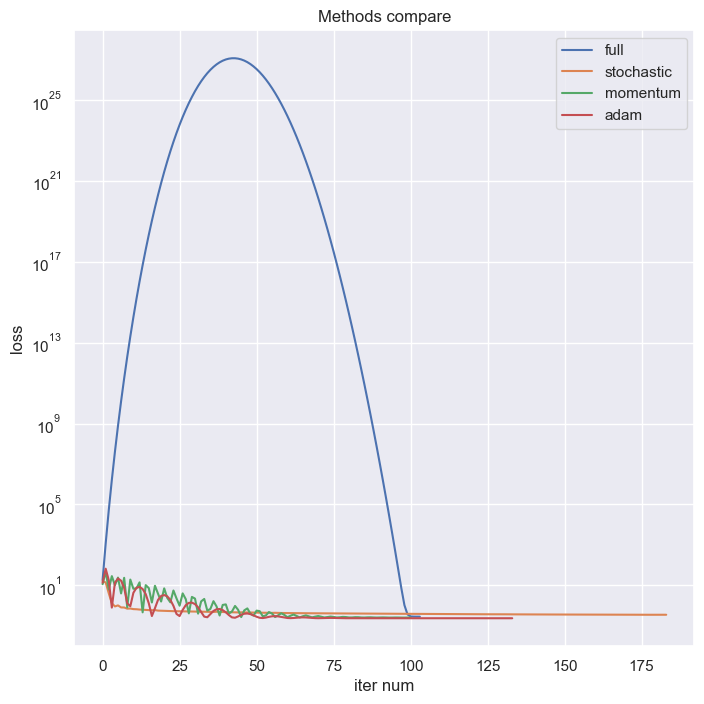

In [156]:
fig = plt.figure(figsize = (8,8))
for method in methods_results:
    losses = methods_results[method].losses
    plt.plot(list(range(len(losses))), losses, label = method)
plt.semilogy()
plt.xlabel("iter num")
plt.ylabel("loss")
plt.title("Methods compare")
plt.legend()
plt.show()

Видим, что full сначала улетает в космос, а потом быстро сходится, быстрее, чем все методы. Видимо, потому что нам с самого начала указывают точное направление минимума, но lr вначале большой и нет адаптации шага, как в adam, мы его сильно перелетаем, а в конце в него отлично приходим. Stochastic далеко не улетает, но сходится плохо, его останавливает только количество итераций, оно и понятно, вель у нас градиент не полный и без всякой адаптации. Momentum и Adam хорошо сходятся, кол-во итераци похоже на количество итераций полного, при этом у них лосс не бывает таким большим, в отличие от full, но у них довольно сильные флуктуации наблюдаются. Касательно лосса и r2 метрики: лучшие результаты у adam, потом momentum, потом full, потом stochastic.

## Задание 6. Стохастический градиентный спуск и размер батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска. 

* Сделайте по несколько запусков (например, k = 10) стохастического градиентного спуска на обучающей выборке для каждого размера батча из перебираемого списка. Замерьте время в секундах и количество итераций до сходимости. Посчитайте среднее этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча.
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

In [54]:
descent_config = {
    'descent_name': "stochastic",
    'kwargs': {
        'dimension': x_train.shape[1],
        "lambda_": methods_results["stochastic"].lambda_,
        "batch_size": 100
    }
}

regression = LinearRegression(
    descent_config=descent_config
)

regression.fit(x_train, y_train)

In [56]:
len(regression.loss_history)

226

In [93]:
from datetime import datetime
import tqdm

In [94]:
batch_sizes = np.arange(5, 500, 10)
average_times = []
average_iters_amount = []
k = 5
tqdm.tqdm()

for batch_size in tqdm.tqdm(batch_sizes):
    times = []
    iters_amount = []
    for _ in range(k):
        descent_config = {
        'descent_name': "stochastic",
        'kwargs': {
            'dimension': x_train.shape[1],
            "lambda_": methods_results["stochastic"].lambda_,
            "batch_size": batch_size,
            }
        }

        regression = LinearRegression(
            descent_config=descent_config,
        )
        begin = datetime.now()
        regression.fit(x_train, y_train)
        end = datetime.now()
        times.append(end - begin)
        iters_amount.append(len(regression.loss_history))
    average_times.append(np.mean(list(map(lambda x : x.total_seconds(), times))))
    average_iters_amount.append(np.mean(iters_amount))
    

0it [00:00, ?it/s]
100%|██████████| 50/50 [19:14<00:00, 23.08s/it]


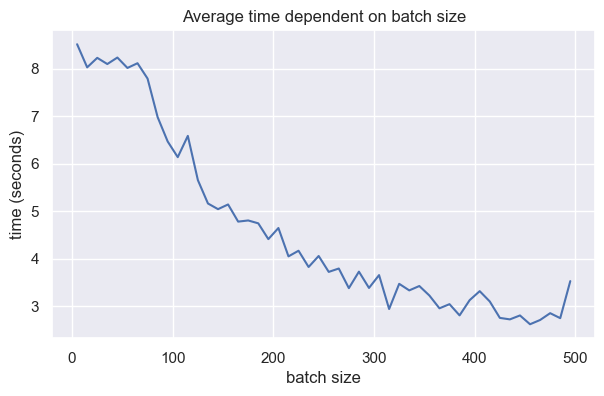

In [104]:
fig = plt.figure(figsize = (7, 4))
plt.plot(batch_sizes, average_times)
plt.xlabel("batch size")
plt.ylabel("time (seconds)")
plt.title("Average time dependent on batch size")
plt.show()

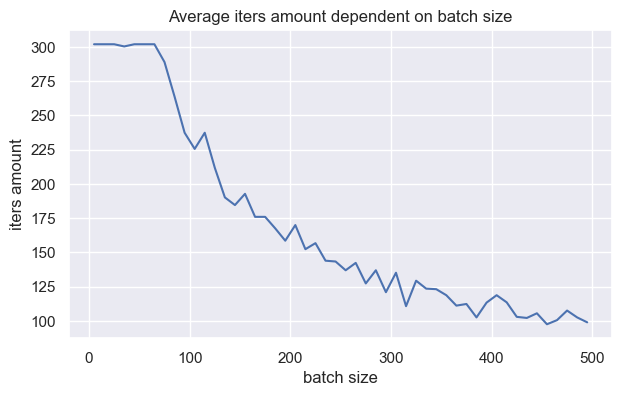

In [105]:
fig = plt.figure(figsize = (7, 4))
plt.plot(batch_sizes, average_iters_amount)
plt.xlabel("batch size")
plt.ylabel("iters amount")
plt.title("Average iters amount dependent on batch size")
plt.show()

Видим следующее: время имеет четкий тренд вниз где-то до размера батча 350, потом тренд скорее переходит в горизонтальный, а на 500 подскакивает вверх. С итерациями картина похожая, но на 500 нет подскока вверх. Выводы следующие: надо брать батч такой, чтобы было оптимальной по времени работы в смысле количества итераций (чтобы сходилось побыстрее), но при этом, чтобы мы не тратили много на то, чтобы эти матрицы гигантские обсчитывать. В нашем случае, очевидно, что до 300 это очень мало, ведь у нас огромная выборка по сравнению с этим. Дальше 500 непонятно, что будет, может там время обсчета будет сильно расти и это может невелировать ту скорочть сходимости, который дает больший размер батча, но где-то около 400-500 норма получается, итераций немного и по времени хорошо.

## Задание 7. Регуляризация (1 балл)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Протестируйте ваше решение в контесте.

Вставьте ссылку на успешную посылку:

* **BaseDescentReg**: https://contest.yandex.ru/contest/41257/problems/F/

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Будем подбирать длину шага $\lambda$ (`lambda_`) и коэффициент регуляризации $\mu$ (`mu`).

Сравните для каждого метода результаты с регуляризацией и без регуляризации (нужно опять сохранить ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках и количество итераций до сходимости).

Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации (всего должно получиться 4 графика).

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Как изменилось качество на обучающей выборке? На тестовой? Чем вы можете объяснить это?

У нас lambda_ уже подобраны сверху, поэтому сейчас подбираем mu

In [ ]:
methods = ["full", "stohastic", "momentum", "adam"]
mus = np.logspace(-3, 0, 10)
lambdas = np.logspace(-2, 1, 10)
from sklearn.metrics import r2_score

methods_reg_results = {
    "full" : [],
    'stochastic' : [],
    "momentum": [],
     "adam": []
}

for method in tqdm.tqdm(methods_reg_results):
    for lambda_ in lambdas:
        print(method, lambda_)
        for mu in mus:
            descent_config = {
                'descent_name': method,
                'regularized': True,
                'kwargs': {
                    'lambda_': lambda_,
                    'dimension': x_train.shape[1],
                    'mu': mu,
                }
            }

            regression = LinearRegression(
                descent_config=descent_config
            )

            regression.fit(x_train, y_train)

            res = Result(
                losses=regression.loss_history,
                lambda_=lambda_,
                iter_count=len(regression.loss_history),


                train_loss = regression.calc_loss(x_train, y_train),
                val_loss = regression.calc_loss(x_val, y_val),
                test_loss = regression.calc_loss(x_test, y_test),

                r2_metric_train = r2_score(regression.predict(x_train), y_train),
                r2_metric_val = r2_score(regression.predict(x_val), y_val),
                r2_metric_test = r2_score(regression.predict(x_test), y_test),
                mu=mu,
            )
            methods_reg_results[method].append(res)
        



In [126]:
import copy
methods_reg_results_copy = copy.deepcopy(methods_reg_results)

In [130]:
for method in methods_reg_results:
    best_val_loss_idx = -1
    best_val_loss = 10**9
    i = 0
    for res in methods_reg_results[method]:
        if res.val_loss < best_val_loss:
            best_val_loss_idx = i
            best_val_loss = res.val_loss
        i += 1
    methods_reg_results[method] = methods_reg_results[method][best_val_loss_idx]


In [131]:
for method in methods_reg_results:
    res = methods_reg_results[method]
    print(f"best lambda for {method} is {res.lambda_}, best mu is {res.mu}, train loss {res.train_loss}, test loss {res.test_loss}\n \
    , r2 score {res.r2_metric_test}, iter num {res.iter_count}")
    print("_______________________________________________")

best lambda for full is 1.0, best mu is 0.021544346900318832, train loss 0.31671409520834143, test loss 0.382000244429464
     , r2 score 0.6023648522563911, iter num 166
_______________________________________________
best lambda for stochastic is 0.46415888336127775, best mu is 0.021544346900318832, train loss 0.34795278374912186, test loss 0.4111615894447556
     , r2 score 0.6092279048818039, iter num 202
_______________________________________________
best lambda for momentum is 1.0, best mu is 0.0021544346900318843, train loss 0.24653680464088246, test loss 0.3074051773776769
     , r2 score 0.6886229091815278, iter num 173
_______________________________________________
best lambda for adam is 4.6415888336127775, best mu is 0.001, train loss 0.24014832390044086, test loss 0.3010323138490553
     , r2 score 0.6964216327447172, iter num 283
_______________________________________________


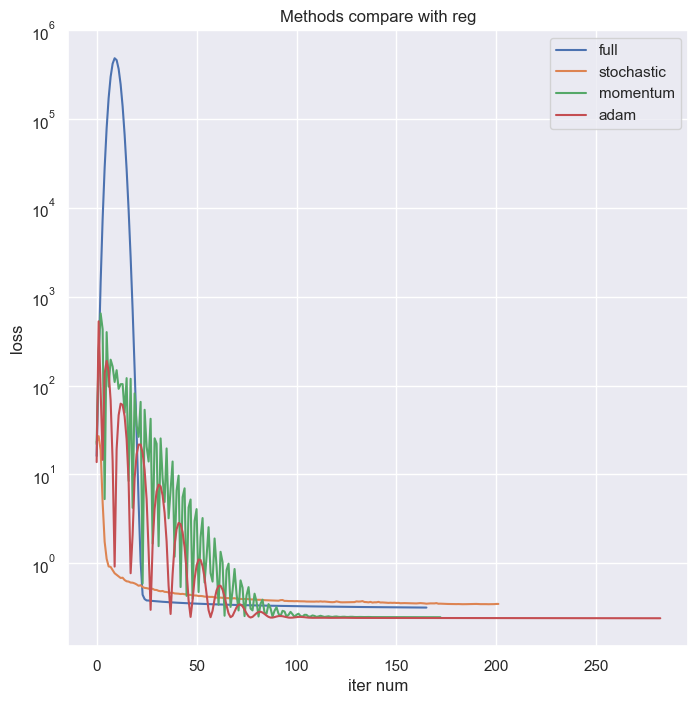

In [145]:
fig = plt.figure(figsize = (8,8))
for method in methods_reg_results:
    losses = methods_reg_results[method].losses
    plt.plot(list(range(len(losses))), losses, label = method)
plt.semilogy()
plt.xlabel("iter num")
plt.ylabel("loss")
plt.title("Methods compare with reg")
plt.legend()
plt.show()

In [148]:
for method in methods_reg_results:
    res_reg = methods_reg_results[method]
    res = methods_results[method]
    print(method)
    print(f"With REG: train loss {res_reg.train_loss}, test loss {res_reg.test_loss}, r2 score {res_reg.r2_metric_test}, iter num {res_reg.iter_count}")
    print(f"WithOUT REG: train loss {res.train_loss}, test loss {res.test_loss}, r2 score {res.r2_metric_test}, iter num {res.iter_count}")
    print("_______________________________________________")

full
With REG: train loss 0.31671409520834143, test loss 0.382000244429464, r2 score 0.6023648522563911, iter num 166
WithOUT REG: train loss 0.28876937645398726, test loss 0.3511209436464539, r2 score 0.652183100226783, iter num 105
_______________________________________________
stochastic
With REG: train loss 0.34795278374912186, test loss 0.4111615894447556, r2 score 0.6092279048818039, iter num 202
WithOUT REG: train loss 0.31646026458756027, test loss 0.3758802840990439, r2 score 0.6351405792871385, iter num 302
_______________________________________________
momentum
With REG: train loss 0.24653680464088246, test loss 0.3074051773776769, r2 score 0.6886229091815278, iter num 173
WithOUT REG: train loss 0.24963841179015125, test loss 0.31182061128648336, r2 score 0.6852988789221492, iter num 137
_______________________________________________
adam
With REG: train loss 0.24014832390044086, test loss 0.3010323138490553, r2 score 0.6964216327447172, iter num 283
WithOUT REG: train l

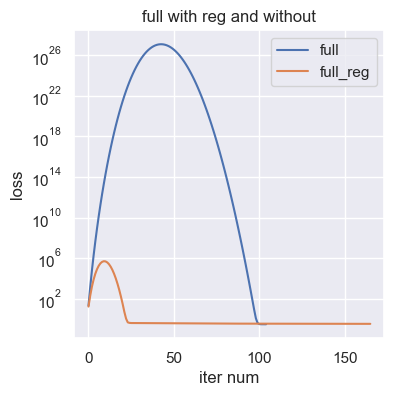

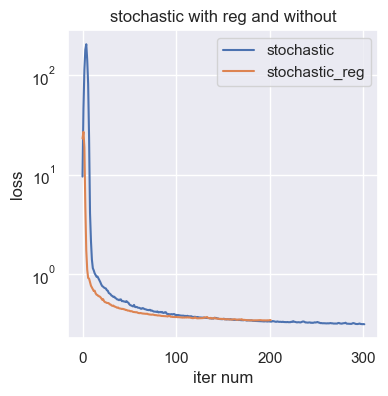

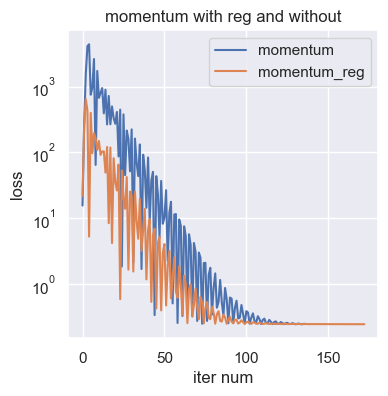

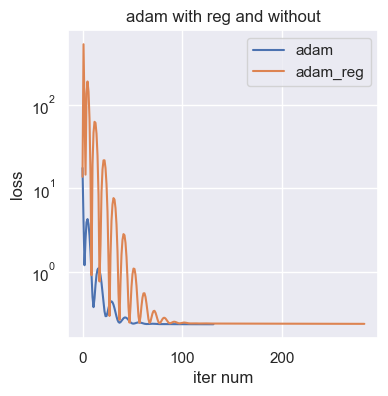

In [147]:
for method in methods_reg_results:
    losses_reg = methods_reg_results[method].losses
    losses = methods_results[method].losses
    fig = plt.figure(figsize = (4,4))
    plt.plot(list(range(len(losses))), losses, label = method)
    plt.plot(list(range(len(losses_reg))), losses_reg, label = method + "_reg")
    plt.semilogy()
    plt.xlabel("iter num")
    plt.ylabel("loss")
    plt.title(f"{method} with reg and without")
    plt.legend()
    plt.show()

Видим, что регуляризация немого увеличивает время сходимости, но при этом лосс на full у нас стал значительно меньше, лосс на stochastic, momentum тоже упал. R2 score увеличился на всех методах, ошибка на трейне почти везде немного подросла, а ошибка на тесте наоборот почти везде упала. Это все проиходит потому что мы штрафуем модель за большие веса, значит не даем ей улететь в космос (это уменьшает наш лосс в процессе обучения), и не даем ей подогнаться под обучающую выборку (это увеличивает наш конечный лосс на трейне, но при этом из-за того что она менее переобученная, лосс на тесте лучше). В некоторых случаях выросло количество итераций, потому что функция стала сложнее и хитрее, нужно больше шагов сделать для того, чтобы найти мимнимум. 

## Задание 8. Альтернативная функция потерь (1 балл)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регрессии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log\left(\cosh(a - y)\right).
$$

Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент:

Тут в случае векторов умножение через $\cdot$ -- это скалярное произведение, а в случае скаляра -- в обычном смысле.

$\frac{\partial \frac{1}{l} \sum log(cosh(x_i \cdot w - y_i))}{\partial w} = \frac{1}{l} \sum tanh(x_i \cdot w - y_i) \cdot x_i$

Получается, что нам надо по факту взять $Xw - y$ поэлементно у получившегося вектора взять $tanh$, а потом умножить каждую строчку $X$ на соответсвующий элемент этого вектора из $tanh(Xw - y)$ и просуммировать все строки, тогда получим градиент. Это и было мной проделано.

Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Пример того, как можно запрограммировать использование нескольких функций потерь внутри одного класса градиентного спуска:


```python
from enum import auto
from enum import Enum

import numpy as np

class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()

...
class BaseDescent:
    def __init__(self, loss_function: LossFunction = LossFunction.MSE):
        self.loss_function: LossFunction = loss_function

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        if self.loss_function is LossFunction.MSE:
            return ...
        elif self.loss_function is LossFunction.LogCosh:
            return ...
...

```

In [196]:
methods = ["full", "stohastic", "momentum", "adam"]
lambdas = np.logspace(-2, 1, 14)
from sklearn.metrics import r2_score

from descents import LossFunction

methods_results_logcosh = {
    "full" : [],
    'stochastic' : [],
    "momentum": [],
     "adam": []
}

for method in methods_results_logcosh:
    for lambda_ in lambdas:
        descent_config = {
            'descent_name': method,
            'kwargs': {
                'lambda_': lambda_,
                'dimension': x_train.shape[1],
                "loss_function": LossFunction.LogCosh,
            }
        }

        regression = LinearRegression(
            descent_config=descent_config
        )

        regression.fit(x_train, y_train)

        res = Result(
            losses=regression.loss_history,
            lambda_=lambda_,
            iter_count=len(regression.loss_history),


            train_loss = regression.calc_loss(x_train, y_train),
            val_loss = regression.calc_loss(x_val, y_val),
            test_loss = regression.calc_loss(x_test, y_test),

            r2_metric_train = r2_score(regression.predict(x_train), y_train),
            r2_metric_val = r2_score(regression.predict(x_val), y_val),
            r2_metric_test = r2_score(regression.predict(x_test), y_test),
        )
        methods_results_logcosh[method].append(res)
        



In [197]:
#выбираем лучшую lambda_
for method in methods_results_logcosh:
    best_val_loss_idx = -1
    best_val_loss = 10**9
    i = 0
    for res in methods_results_logcosh[method]:
        if res.val_loss < best_val_loss:
            best_val_loss_idx = i
            best_val_loss = res.val_loss
        i += 1
    methods_results_logcosh[method] = methods_results_logcosh[method][best_val_loss_idx]

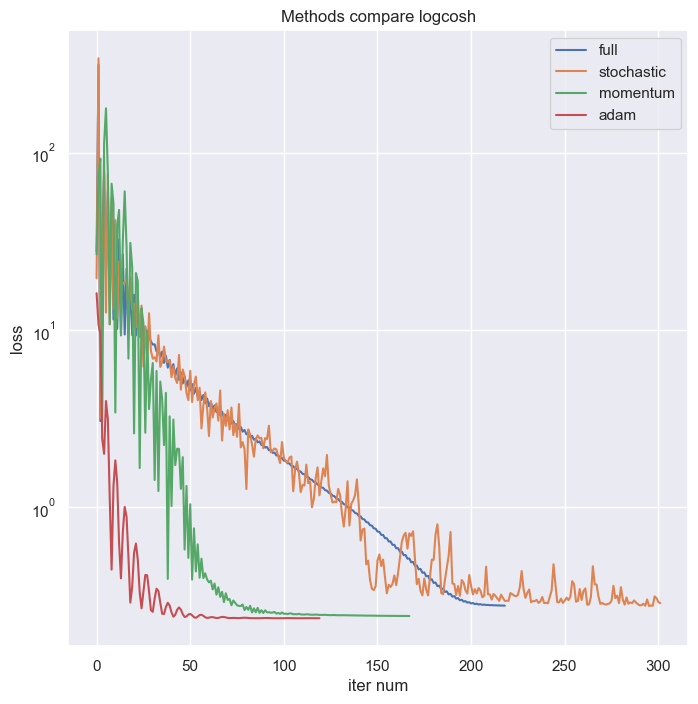

In [200]:
fig = plt.figure(figsize = (8,8))
for method in methods_results_logcosh:
    losses = methods_results_logcosh[method].losses
    plt.plot(list(range(len(losses))), losses, label = method)
plt.semilogy()
plt.xlabel("iter num")
plt.ylabel("loss")
plt.title("Methods compare logcosh")
plt.legend()
plt.show()

In [199]:
for method in methods_results:
    res = methods_results[method]
    res_logcosh = methods_results_logcosh[method]
    print(method)
    print(f"LogCosh: train loss {res_logcosh.train_loss}, test loss {res_logcosh.test_loss}, r2 score {res_logcosh.r2_metric_test}, iter num {res_logcosh.iter_count}")
    print(f"MSE: train loss {res.train_loss}, test loss {res.test_loss}, r2 score {res.r2_metric_test}, iter num {res.iter_count}")
    print("_______________________________________________")

full
LogCosh: train loss 0.27900173436228565, test loss 0.3398975080849516, r2 score 0.6622663004140136, iter num 219
MSE: train loss 0.2836872098454245, test loss 0.3439440485708362, r2 score 0.6612776510434665, iter num 104
_______________________________________________
stochastic
LogCosh: train loss 0.28810118342519614, test loss 0.3507316197801331, r2 score 0.6463029870180432, iter num 302
MSE: train loss 0.352920700055985, test loss 0.4186643296264721, r2 score 0.588021432688371, iter num 184
_______________________________________________
momentum
LogCosh: train loss 0.2438611551645218, test loss 0.3047890461828003, r2 score 0.6951043818033875, iter num 168
MSE: train loss 0.25666798844191313, test loss 0.31576677181420076, r2 score 0.6820689911213869, iter num 101
_______________________________________________
adam
LogCosh: train loss 0.2368851417352752, test loss 0.298881261626608, r2 score 0.7029804961641812, iter num 120
MSE: train loss 0.2368445248665548, test loss 0.29840

У LogCosh градиент на full не улетает в космос, но итераций на стохастик понадобилось больше, также его как будто больше колбасило, чем MSE. 
Качество очень похожее, но у LogCosh почти веззде меньше лосс и на трейне и на тесте, а r2 score везде немного повыше (исключение -- adam).

### Кулинарно-социализационный бонус. (0.5 балла).

Как мы знаем, осень прекрасная пора, время пробовать новое и делиться теплом с друзьями и близкими. Выберите рецепт, который соответствует вашему настроению, приготовьте выбранное блюдо и угостите хотя бы одного человека им. Кратко опишите ваши впечатления, прикрепите рецепт и фотографии блюда и довольного гостя.

`### ваш кулинарный опыт тут ###`

### Бонус 1. Другие методы градиентного спуска (1 балл).

По желанию выберите метод градиентного спуска из следующего списка и самостоятельно реализуйте его в файле `descents.py`. Обучите линейную регрессию с помощью этого метода, сравните с методами из основной части домашнего задания.

`AdaMax` (вариация Adam основанная на $l_{\infty}$), `Nadam` (вариация Adam совмещенная с методом импульса Нестерова), `AMSGrad` (ещё одна вариация Adam).

In [ ]:
# YOUR CODE:

### Бонус 2. Другие функции потерь (1 балл).

Аналогично 8 заданию реализуйте две функции потерь - **MAE** и **Huber**.

Самостоятельно продифференцируйте данные функции потерь, чтобы найти их градиенты:

`### ваше решение тут ###`

Программно реализуйте градиентный спуск с данными функциями потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Сравните между собой *для каждого метода отдельно* качество для разных функций потерь. Какая оказалась лучше? Как вы думаете почему?

In [ ]:
# YOUR CODE: